In [1]:
from WEB import *

In [2]:
# import WEB
# import importlib
# importlib.reload(WEB)
# from WEB import simulation_plot

In [3]:
START_RAD = 0
MAX_RAD = 1
GAP = 0.2

#點個數乘以６
PONITS_NUM = 5
#組個數
IN_GROUP_NUM = 50
#汙染間隔
CONTAMINATED = 0.05
#汙染的個數
NUM = int(0.5 / CONTAMINATED)

#汙染BETA (正確是[-8, 8]抽出)
CONTAMINATED_BETA0_BTW_GROUP = -8
CONTAMINATED_BETA1_BTW_GROUP = 6
#None就是原本資料的值
CONTAMINATED_BETA0_WITHIN_GROUP = -8
CONTAMINATED_BETA1_WITHIN_GROUP = 10

In [4]:
web = WEB(start_radius=START_RAD, max_radius=MAX_RAD, gap=GAP)

mse_WEBs = []
mse_WEBs_wo_lambdas = []
mse_MDPDEs = []
mse_OLSs = []
mse_EBs = []
mse_hyper_WEBs = []
mse_hyper_WEBs_wo_lambdas = []
mse_sigma_matrices_MDPDE = []

for i in tqdm(range(NUM)):
    #存WEB的MSE
    mse_0_WEB = np.zeros(NUM)
    mse_1_WEB = np.zeros(NUM)
    mse_hyper_WEB = np.zeros(NUM)

    mse_0_WEB_wo_lambdas = np.zeros(NUM)
    mse_1_WEB_wo_lambdas = np.zeros(NUM)
    mse_hyper_WEB_wo_lambdas = np.zeros(NUM)
    #存MDPDE的MSE
    mse_0_MDPDE = np.zeros(NUM)
    mse_1_MDPDE = np.zeros(NUM)
    mse_sigma_matrix_MDPDE = np.zeros(NUM)
    #存OLS的MSE
    mse_0_OLS = np.zeros(NUM)
    mse_1_OLS = np.zeros(NUM)
    #存EB的MSE
    mse_0_EB = np.zeros(NUM)
    mse_1_EB = np.zeros(NUM)
    #存WEIGHTS
    weights = np.zeros(NUM)

    contained_ratio_beta = CONTAMINATED * i
    for j in tqdm(range(NUM)):
        contained_ratio_data = CONTAMINATED * j
        #造資料
        web.create_data(
            group_num=1, 
            group_name=["A"], 
            contained_ratio_data=contained_ratio_data, 
            contained_ratio_beta=contained_ratio_beta, 
            in_group_num=IN_GROUP_NUM,
            points_num=PONITS_NUM, 
            contaminated_beta0_within_group=CONTAMINATED_BETA0_WITHIN_GROUP, 
            contaminated_beta1_within_group=CONTAMINATED_BETA1_WITHIN_GROUP
            )
        web.paramters_initial()
        web.empirical_bayes()
        web.WEB_iter_test2(max_iter=500, alpha=0.2, gamma=0.2, verbose=1)
        mse_0_OLS[j], mse_1_OLS[j] = np.sum((web.betas["A"] - web.betas_OLS["A"])**2, axis=0)
        # mse_0_EB[j], mse_1_EB[j] = np.sum((web.betas["A"] - web.betas_EB["A"])**2, axis=0)
        mse_0_WEB[j], mse_1_WEB[j] = np.sum((web.betas["A"] - web.betas_WEB["A"])**2, axis=0)
        mse_0_WEB_wo_lambdas[j], mse_1_WEB_wo_lambdas[j] = np.sum((web.betas["A"] - web.betas_WEB_wo_lambdas["A"])**2, axis=0)
        mse_0_MDPDE[j], mse_1_MDPDE[j] = np.sum((web.betas["A"] - web.betas_MDPDE["A"])**2, axis=0)
        mse_hyper_WEB[j] = np.sum((web.mus["A"] - web.mus_mle["A"])**2) / 2
        mse_hyper_WEB_wo_lambdas[j] = np.sum((web.mus["A"] - web.mus_mle_wo_lambdas["A"])**2) / 2
        
        mse_sigma_matrix_MDPDE[j] = np.sum((np.array([[0.8, 0], [0, 1.2]]) - web.sigma_matrices_MDPDE["A"])**2)
        weights[j] = np.mean(web.weights["A"])
    mse_WEBs.append(mse_0_WEB + mse_1_WEB)
    mse_WEBs_wo_lambdas.append(mse_0_WEB_wo_lambdas + mse_1_WEB_wo_lambdas)
    mse_MDPDEs.append(mse_0_MDPDE + mse_1_MDPDE)
    mse_OLSs.append(mse_0_OLS + mse_1_OLS)
    # mse_EBs.append(mse_0_EB + mse_1_EB)
    mse_hyper_WEBs.append(mse_hyper_WEB)
    mse_hyper_WEBs_wo_lambdas.append(mse_hyper_WEB_wo_lambdas)
    mse_sigma_matrices_MDPDE.append(mse_sigma_matrix_MDPDE)

  0%|          | 0/10 [00:00<?, ?it/s]INFO:root:A MDPDE finished in iteration: 24
INFO:root:A WEB finished in iteration: 10
INFO:root:===================================
INFO:root:A MDPDE finished in iteration: 23
INFO:root:A WEB finished in iteration: 11
INFO:root:===================================
INFO:root:A MDPDE finished in iteration: 46
INFO:root:A WEB finished in iteration: 11
INFO:root:===================================
INFO:root:A MDPDE finished in iteration: 29
INFO:root:A WEB finished in iteration: 11
INFO:root:===================================
INFO:root:A MDPDE finished in iteration: 17
INFO:root:A WEB finished in iteration: 11
INFO:root:===================================
INFO:root:A MDPDE finished in iteration: 16
INFO:root:A WEB finished in iteration: 12
INFO:root:===================================
INFO:root:A MDPDE finished in iteration: 11
INFO:root:A WEB finished in iteration: 12
INFO:root:===================================
INFO:root:A MDPDE finished in iteratio

In [8]:
caculate_mus_MDPDE(web.betas_MDPDE["A"], web.lambdas["A"])

array([-7.93135906,  8.39231856])

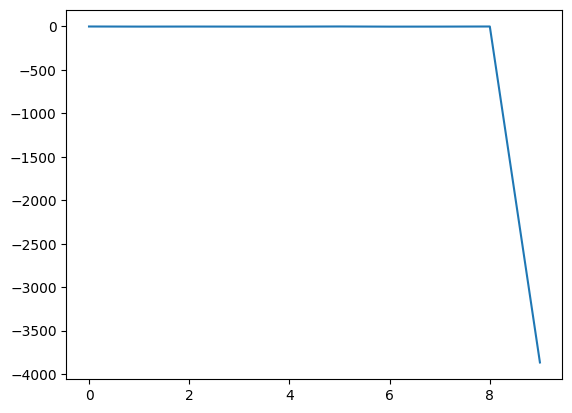

In [6]:
plt.plot((mse_0_WEB + mse_1_WEB) - (mse_0_MDPDE + mse_1_MDPDE))

/home/bookbnnbnn/work/WEB/Empirical_Bayes_Q-scores/WEB/utils.py:299: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


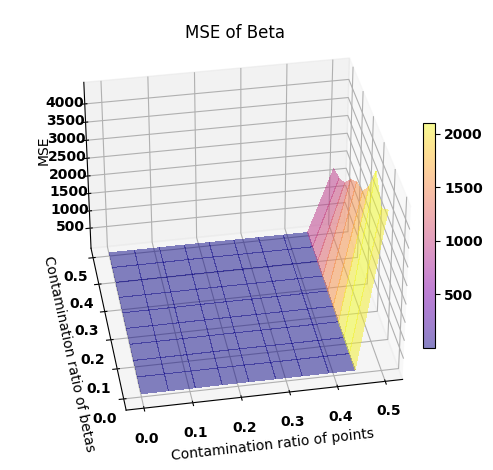

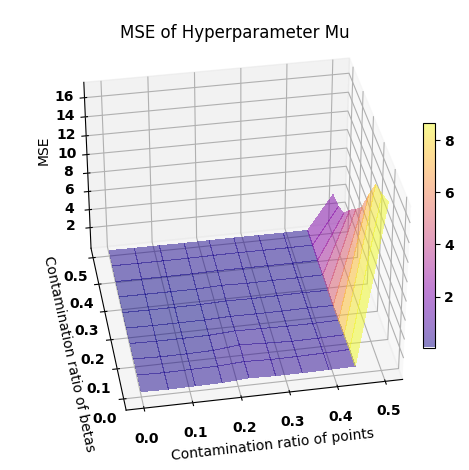

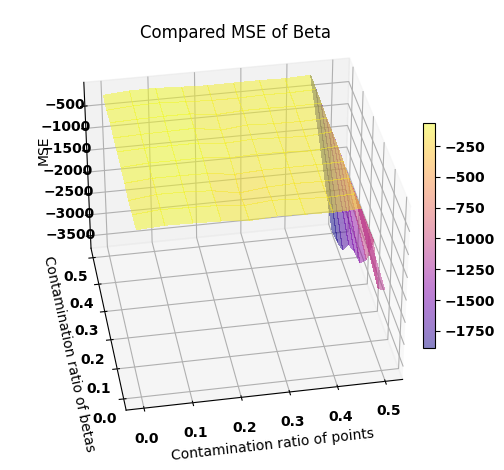

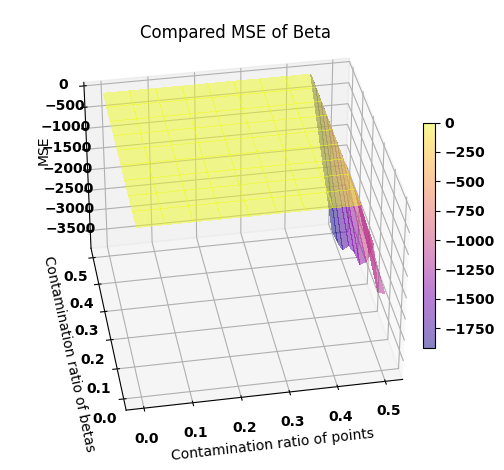

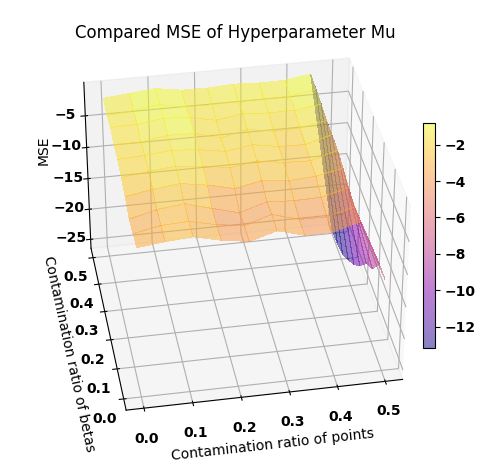

In [8]:
counts = 10
MAX_NUM = 0.5
simulation_plot(np.array(mse_WEBs), "MSE", "MSE of Beta", max_num = MAX_NUM, save=True)
simulation_plot(np.array(mse_hyper_WEBs), "MSE", "MSE of Hyperparameter Mu", max_num = MAX_NUM, save=True)
simulation_plot(np.array(mse_WEBs) - np.array(mse_WEBs_wo_lambdas), "MSE", "Compared MSE of Beta", max_num = MAX_NUM, save=True)
simulation_plot((np.array(mse_WEBs) - np.array(mse_MDPDEs)), "MSE", "Compared MSE of Beta", max_num = MAX_NUM, save=True)
simulation_plot(np.array(mse_hyper_WEBs) - np.array(mse_hyper_WEBs_wo_lambdas), "MSE", "Compared MSE of Hyperparameter Mu", max_num = MAX_NUM, save=True)

In [22]:
# MAX_NUM = 0.45
# simulation_plot(np.array(mse_WEBs)[:, :8], "MSE", "MSE of Beta ", max_num = MAX_NUM, save=True)
# simulation_plot(np.array(mse_hyper_WEBs)[:, :8], "MSE", "MSE of Hyperparameter Mu ", max_num = MAX_NUM, save=True)
# simulation_plot(np.array(mse_WEBs) - np.array(mse_WEBs_wo_lambdas), "MSE", "Compared MSE of Beta")
# simulation_plot((np.array(mse_WEBs) - np.array(mse_MDPDEs))[:, :8], "MSE", "Compared MSE of Beta ", max_num = MAX_NUM, save=True)
# simulation_plot(np.array(mse_hyper_WEBs) - np.array(mse_hyper_WEBs_wo_lambdas), "MSE", "Compared MSE of Hyperparameter Mu")

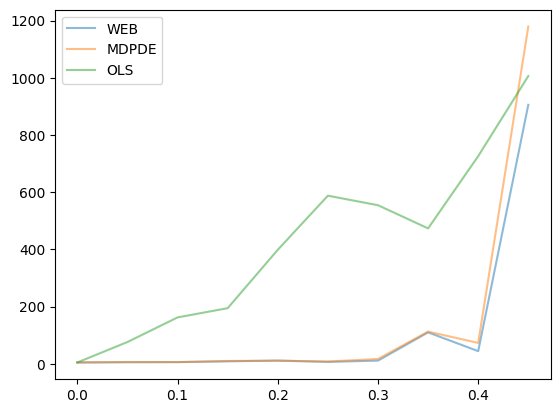

In [5]:
# 截距和斜率的污染
i = 0
X_axis = np.arange(0, 0.5, 0.5 / NUM)
plt.plot(X_axis, mse_WEBs[i], label="WEB", alpha=0.5)
plt.plot(X_axis, mse_MDPDEs[i], label="MDPDE", alpha=0.5)
plt.plot(X_axis, mse_OLSs[i], label="OLS", alpha=0.5)
# plt.plot(mse_0_WEB_wo_lambdas[i], label="WEB_wo_lambdas", alpha=0.5)
# plt.plot(mse_EBs[i], label="EB", alpha=0.5)
plt.legend()

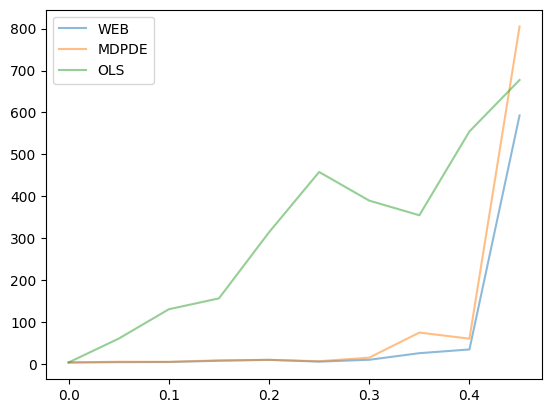

In [9]:
# 截距的污染
i = 0
X_axis = np.arange(0, 0.5, 0.5 / NUM)
plt.plot(X_axis, mse_WEBs[i], label="WEB", alpha=0.5)
plt.plot(X_axis, mse_MDPDEs[i], label="MDPDE", alpha=0.5)
plt.plot(X_axis, mse_OLSs[i], label="OLS", alpha=0.5)
# plt.plot(mse_0_WEB_wo_lambdas[i], label="WEB_wo_lambdas", alpha=0.5)
# plt.plot(mse_EBs[i], label="EB", alpha=0.5)
plt.legend()

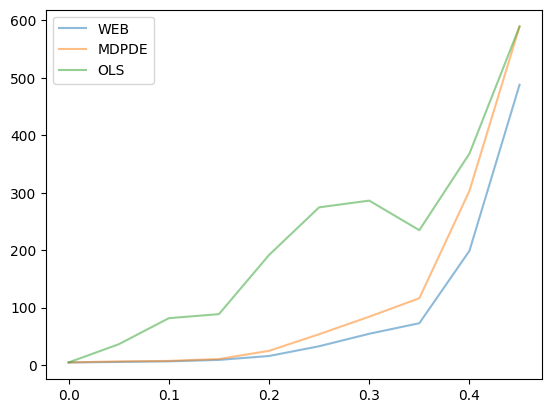

In [5]:
# 斜率的污染
i = 0
X_axis = np.arange(0, 0.5, 0.5 / NUM)
plt.plot(X_axis, mse_WEBs[i], label="WEB", alpha=0.5)
plt.plot(X_axis, mse_MDPDEs[i], label="MDPDE", alpha=0.5)
plt.plot(X_axis, mse_OLSs[i], label="OLS", alpha=0.5)
# plt.plot(mse_0_WEB_wo_lambdas[i], label="WEB_wo_lambdas", alpha=0.5)
# plt.plot(mse_EBs[i], label="EB", alpha=0.5)
plt.legend()

Text(0.5, 1.0, 'MSE of Sigma Matrix')

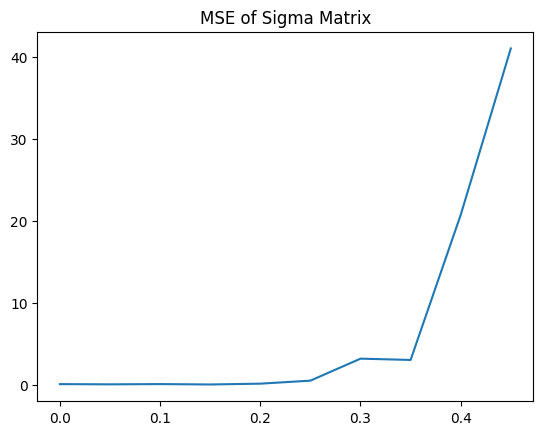

In [13]:
plt.plot(X_axis, mse_sigma_matrices_MDPDE[i])
plt.title("MSE of Sigma Matrix")

Text(0.5, 1.0, 'MSE of mu')

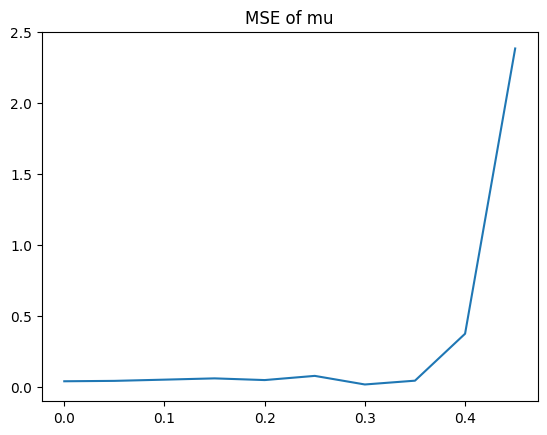

In [14]:
plt.plot(X_axis, mse_hyper_WEBs[i])
plt.title("MSE of mu")

In [21]:
#存WEB的MSE
mse_0_WEB = np.zeros((NUM, NUM))
mse_1_WEB = np.zeros((NUM, NUM))
mse_hyper_WEB = np.zeros((NUM, NUM))

mse_0_WEB_wo_lambdas = np.zeros((NUM, NUM))
mse_1_WEB_wo_lambdas = np.zeros((NUM, NUM))
mse_hyper_WEB_wo_lambdas = np.zeros((NUM, NUM))
#存MDPDE的MSE
mse_0_MDPDE = np.zeros((NUM, NUM))
mse_1_MDPDE = np.zeros((NUM, NUM))
#存WEIGHTS
weights = np.zeros((NUM, NUM))
#初始設定
web = WEB(start_radius=START_RAD, max_radius=MAX_RAD, gap=GAP)

for i in tqdm(range(NUM)):
    contained_ratio_beta = CONTAMINATED * i
    for j in range(NUM):
        contained_ratio_data = CONTAMINATED * j
        #造資料
        web.create_data(
            group_num=1, 
            group_name=["A"], 
            contained_ratio_data=contained_ratio_data, 
            contained_ratio_beta=contained_ratio_beta, 
            in_group_num=IN_GROUP_NUM,
            points_num=PONITS_NUM, 
            contaminated_beta0_btw_group=CONTAMINATED_BETA0_BTW_GROUP,
            contaminated_beta1_btw_group=CONTAMINATED_BETA1_BTW_GROUP,
            contaminated_beta0_within_group=CONTAMINATED_BETA0_WITHIN_GROUP, 
            contaminated_beta1_within_group=CONTAMINATED_BETA1_WITHIN_GROUP, 
            )
        web.paramters_initial()
        web.WEB_iter_test2(max_iter=500, alpha=0.5, gamma=0.5, verbose=0)
        mse_0_WEB[i][j], mse_1_WEB[i][j] = np.sum((web.betas["A"] - web.betas_WEB["A"])**2, axis=0)
        mse_0_WEB_wo_lambdas[i][j], mse_1_WEB_wo_lambdas[i][j] = np.sum((web.betas["A"] - web.betas_WEB_wo_lambdas["A"])**2, axis=0)
        mse_0_MDPDE[i][j], mse_1_MDPDE[i][j] = np.sum((web.betas["A"] - web.betas_WLR["A"])**2, axis=0)
        mse_hyper_WEB[i][j] = np.sum((web.mus["A"] - web.mus_mle["A"])**2) / 2
        mse_hyper_WEB_wo_lambdas[i][j] = np.sum((web.mus["A"] - web.mus_mle_wo_lambdas["A"])**2) / 2
        weights[i][j] = np.mean(web.weights["A"])

100%|██████████| 4/4 [02:30<00:00, 37.54s/it]


In [22]:
mse_0_WEB + mse_1_WEB

array([[0.30850079, 0.35748388, 0.52299776, 0.54879815],
       [0.30850079, 0.35748388, 0.52299776, 0.54879815],
       [0.30850079, 0.35748388, 0.52299776, 0.54879815],
       [0.30850079, 0.35748388, 0.52299776, 0.54879815]])

In [24]:
mse_0_WEB_wo_lambdas + mse_1_WEB_wo_lambdas

array([[0.30341091, 0.34665248, 0.49023568, 0.53278874],
       [0.30341091, 0.34665248, 0.49023568, 0.53278874],
       [0.30341091, 0.34665248, 0.49023568, 0.53278874],
       [0.30341091, 0.34665248, 0.49023568, 0.53278874]])

In [9]:
mse_1_WEB - mse_1_WEB_wo_lambdas + mse_0_WEB - mse_0_WEB_wo_lambdas

array([[ 7.02339545e-03,  1.48108205e-02,  4.58126510e-02,
         2.92309266e-02,  1.49659041e+00],
       [-1.37989202e-01, -2.13408940e-01, -4.05574591e-01,
        -5.46945611e-01,  1.32947937e+01],
       [-2.43149141e-01, -2.94298876e-01, -5.66500422e-01,
        -7.91470656e-01,  1.99606518e+01],
       [-3.28885972e-01, -5.88778741e-01, -8.10741090e-01,
        -1.07380580e+00,  2.41193125e+01],
       [-3.39702297e-01, -5.68380110e-01, -1.07337299e+00,
        -1.14142271e+00,  2.92617980e+01]])

In [11]:
mse_0_WEB + mse_1_WEB - (mse_0_WEB_wo_lambdas + mse_1_WEB_wo_lambdas)

array([[0.00508989, 0.0108314 , 0.03276207, 0.01600941],
       [0.00508989, 0.0108314 , 0.03276207, 0.01600941],
       [0.00508989, 0.0108314 , 0.03276207, 0.01600941],
       [0.00508989, 0.0108314 , 0.03276207, 0.01600941]])

In [10]:
mse_0_WEB + mse_1_WEB - (mse_0_WEB_wo_lambdas + mse_1_WEB_wo_lambdas)

array([[ 0.1324407 ,  0.14466658,  0.22465581,  0.06899987],
       [-0.06737049, -0.08839332, -0.17621127, -0.460625  ],
       [ 0.01159593, -0.16189645, -0.28830905, -0.48490351],
       [-0.08250317, -0.42626027, -0.59131198, -0.83480115]])

In [7]:
web.mus_mle

{'A': array([-5.97197348,  5.66184733])}

In [8]:
web.betas

{'A': array([[-10.54237219,  10.62009307],
        [-10.16460075,   9.85851653],
        [-10.4001818 ,  10.2483546 ],
        [-10.51282926,   9.93240003],
        [-10.28148779,  10.12162188],
        [-10.16383001,   9.62133705],
        [-10.00887009,  10.13481345],
        [ -9.9779926 ,  10.10007363],
        [-10.21421348,   9.87750064],
        [-10.21061515,   9.88738766],
        [-10.26493211,   9.43755791],
        [ -9.9437018 ,   9.8725129 ],
        [-10.51908857,  10.14735936],
        [-10.30246849,  10.01731718],
        [ -9.78073501,  10.03879002],
        [ -9.65605288,   9.6272472 ],
        [ -9.88136513,   9.7980762 ],
        [-10.28527945,   9.81036466],
        [-10.1013375 ,  10.01826869],
        [-10.38395918,  10.29685503],
        [ -5.84139192,   5.476744  ],
        [ -5.51465233,   6.61828593],
        [ -5.62819908,   5.94324959],
        [ -6.34838001,   6.34307635],
        [ -6.12243931,   6.37123979],
        [ -5.93323834,   6.3130575 ],
       

In [14]:
np.sum((web.betas["A"] - web.betas_WEB_wo_lambdas["A"])**2, axis=0)

array([0.03957682, 0.49321192])

In [15]:
np.sum((web.betas["A"] - web.betas_WLR["A"])**2, axis=0)

array([0.04333177, 0.53466106])

In [16]:
np.sum((web.betas_WEB["A"] - web.betas["A"])**2, axis=0)

array([0.04084748, 0.50795067])

/home/bookbnnbnn/work/WEB/Empirical_Bayes_Q-scores/WEB/utils.py:297: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


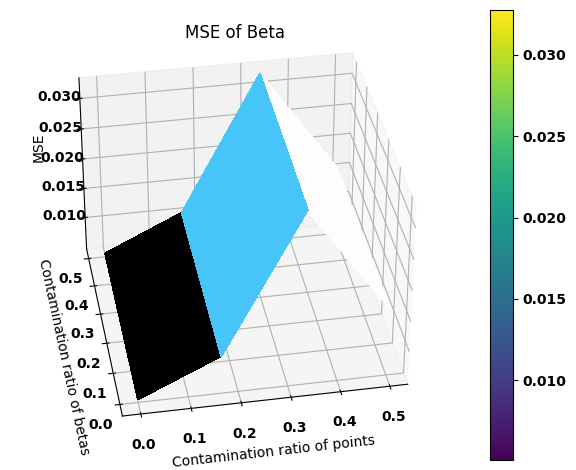

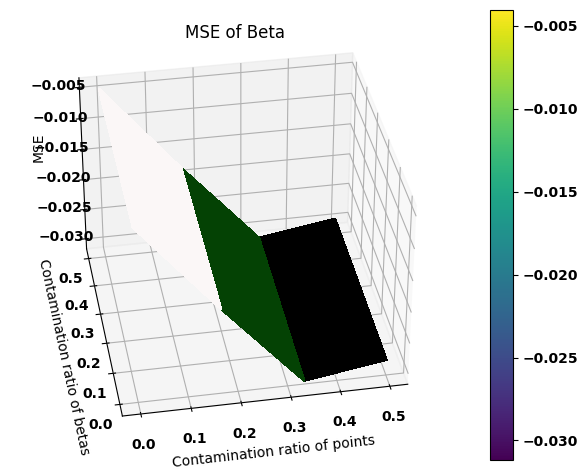

In [13]:
simulation_plot(mse_0_WEB + mse_1_WEB - (mse_0_WEB_wo_lambdas + mse_1_WEB_wo_lambdas), "MSE", "MSE of Beta")
simulation_plot(mse_0_WEB + mse_1_WEB - (mse_0_MDPDE + mse_1_MDPDE), "MSE", "MSE of Beta")

In [16]:
web = WEB(start_radius=START_RAD, max_radius=MAX_RAD, gap=GAP)
web.create_data(
        group_num=1, 
        group_name=["A"], 
        contained_ratio_data=0.2, 
        contained_ratio_beta=0, 
        in_group_num=5,
        points_num=5, 
        contaminated_beta0=CONTAMINATED_BETA0, 
        contaminated_beta1=CONTAMINATED_BETA1
        )

{'A': array([[ -6.38691007,  -6.18039943,  -6.57327185,  -6.14806294,
          -6.2572475 ,  -6.18406839,  -6.25172998,  -6.46216792,
          -6.47737241,  -5.9190207 ,  -6.78950873,  -6.78291528,
          -6.33300976,  -6.31003135,  -6.61791681,  -7.41314223,
          -7.80334141,  -7.20163177,  -6.89240149,  -7.64162161,
          -8.3325042 ,  -8.53527099,  -7.66318129,  -8.18490142,
          -8.51090873,  -8.2467329 ,  -9.26445991, -10.19547462,
          -9.50196628,  -9.59089868],
        [ -5.85370499,  -6.14861773,  -5.53378295,  -5.72084763,
          -6.11758571,  -5.55835476,  -6.00084536,  -5.69104144,
          -5.47234601,  -5.66616088,  -6.50399106,  -6.45682299,
          -5.9280722 ,  -6.27918615,  -6.3392538 ,  -7.02638217,
          -6.7422982 ,  -7.53089658,  -7.11057908,  -6.35073999,
          -7.84397105,  -7.95495944,  -6.97814758,  -6.84649436,
          -7.07809698,  -8.42579517,  -8.85521262,  -8.1688421 ,
          -8.63960782,  -8.11458583],
        [

In [20]:
web.paramters_initial()
_ = web.WEB_iter_test2(max_iter=20, alpha=0.5, gamma=10, verbose=False, Lin=True)

In [21]:
web.betas_WLR

{'A': array([[-6.22396973,  6.59076751],
        [-5.79191853,  5.2888147 ],
        [-5.38394921,  5.70614326],
        [-5.87952265,  6.14264703],
        [-6.20608951,  5.88301794]])}

In [22]:
web.betas_WEB

{'A': array([[-6.25865219,  6.29690852],
        [-5.72993935,  5.72279472],
        [-5.38338467,  5.86231457],
        [-5.89222094,  6.10141511],
        [-6.17329463,  6.02545206]])}

In [33]:
denominate = web.Xs_tilde[name][pos].T @ np.diag(web.weights[name][pos]) @ web.Xs_tilde[name][pos] + np.eye(2)
nominate = web.Xs_tilde[name][pos].T @ np.diag(web.weights[name][pos]) @ web.data_log[name][pos] + web.mus_mle[name]

In [34]:
np.linalg.inv(denominate) @ nominate

array([-6.25865219,  6.29690852])

In [23]:
web.betas

{'A': array([[-6.26787674,  6.62617998],
        [-5.59108571,  5.83661866],
        [-5.18698372,  6.34524494],
        [-5.84610585,  6.18402663],
        [-6.05708005,  6.44329448]])}